In [2]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from pprint import pprint
import requests
import json
import html
from scipy.stats import linregress
import statsmodels.api as sm
import seaborn as sns

In [3]:
csv_merge = "../Resources/merged2014.csv"
df_2014 = pd.read_csv(csv_merge)
df_2014.head()

,Unnamed: 0,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,...,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,Cluster-Group,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2,2014,Europe & Central Asia,SE,SWE,3,Sweden,83.70,100,67,...,91,53,4,High capacity,14,0.82250,0.60784,0.70078,0.8802,0.88656
1,3,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,...,60,79,5,High capacity,4,0.89384,0.96078,1.00000,0.8812,0.80029
2,4,2014,East Asia & Pacific,NZ,NZL,4,New Zealand,80.01,81,76,...,0,67,14,High capacity,9,0.86436,0.78431,0.84251,1.0000,0.75057
3,5,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,...,26,46,13,High capacity,5,0.88966,1.00000,0.92913,0.9224,0.81751
4,6,2014,Europe & Central Asia,NO,NOR,7,Norway,74.59,88,70,...,17,48,8,High capacity,13,0.83572,0.68627,0.75590,0.9380,0.81328


In [4]:
csv_merge = "../Resources/merged2016.csv"
df_2016 = pd.read_csv(csv_merge)
df_2016.head()

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,...,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2016,North America,CA,CAN,2,Canada,89.54,96,87,66,...,63,90,43,8,14,0.82847,0.91525,0.95652,0.85717,0.67173
1,2016,Europe & Central Asia,FR,FRA,3,France,85.13,100,77,70,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,2016,North America,US,USA,4,United States of America,81.62,96,84,63,...,55,70,62,9,12,0.84201,0.89831,0.92754,0.88155,0.71696
3,2016,East Asia & Pacific,AU,AUS,5,Australia,81.15,85,79,76,...,45,75,61,11,2,0.91428,0.98305,0.97826,1.00000,0.76459
4,2016,East Asia & Pacific,NZ,NZL,7,New Zealand,79.38,92,53,63,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364


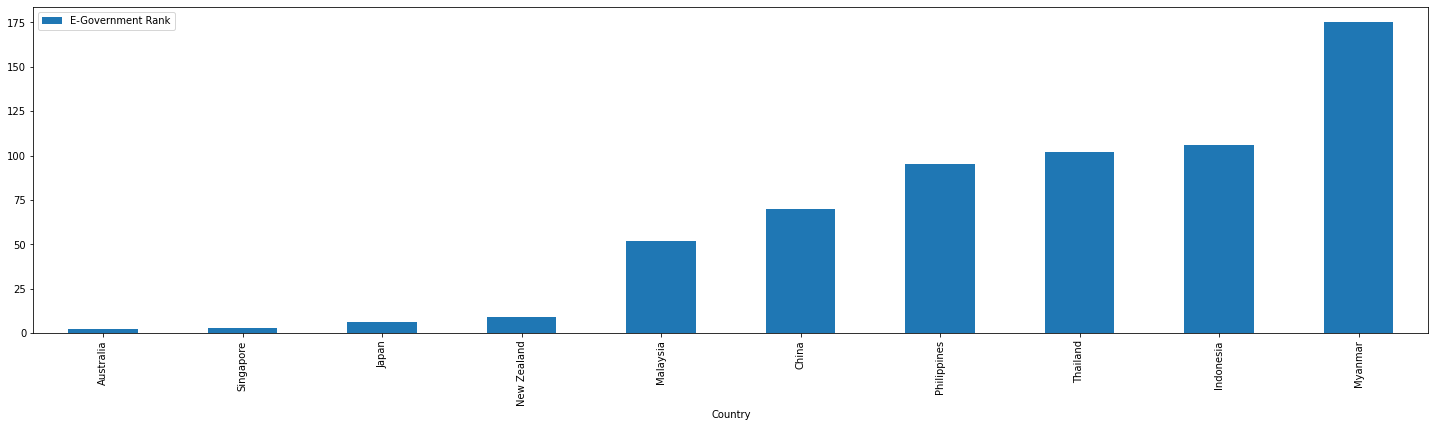

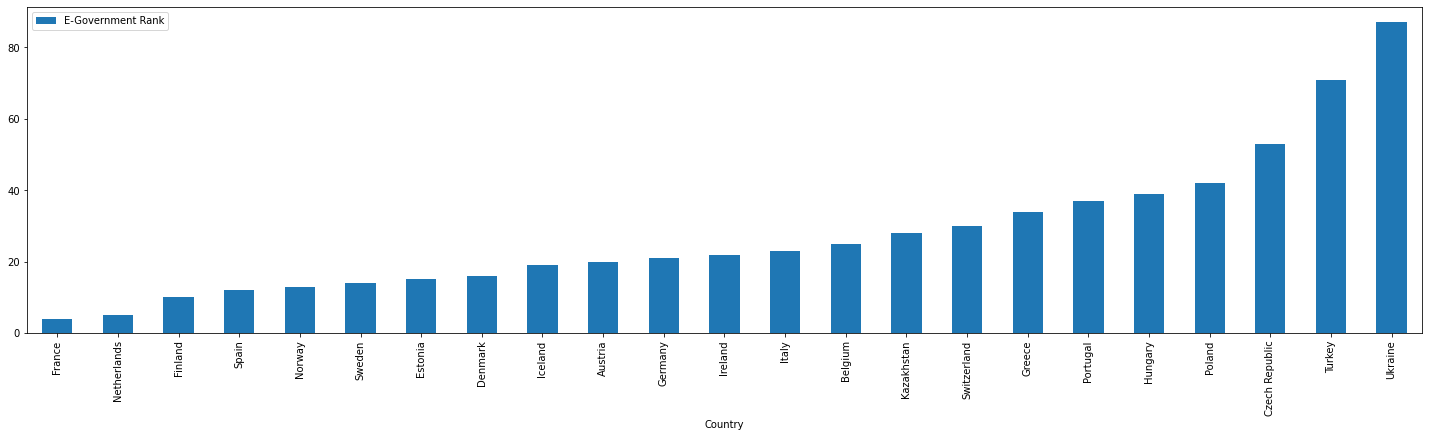

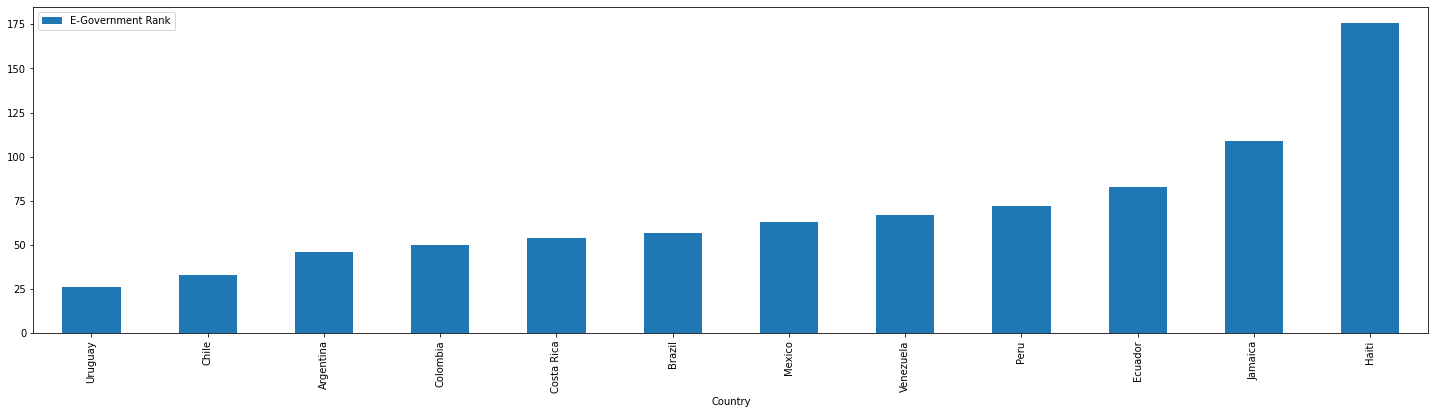

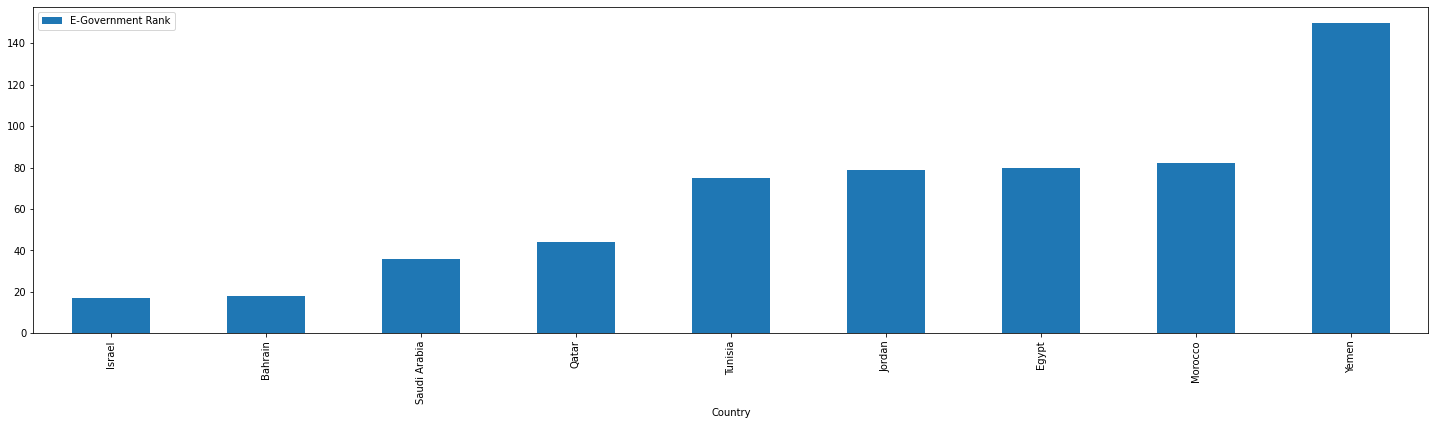

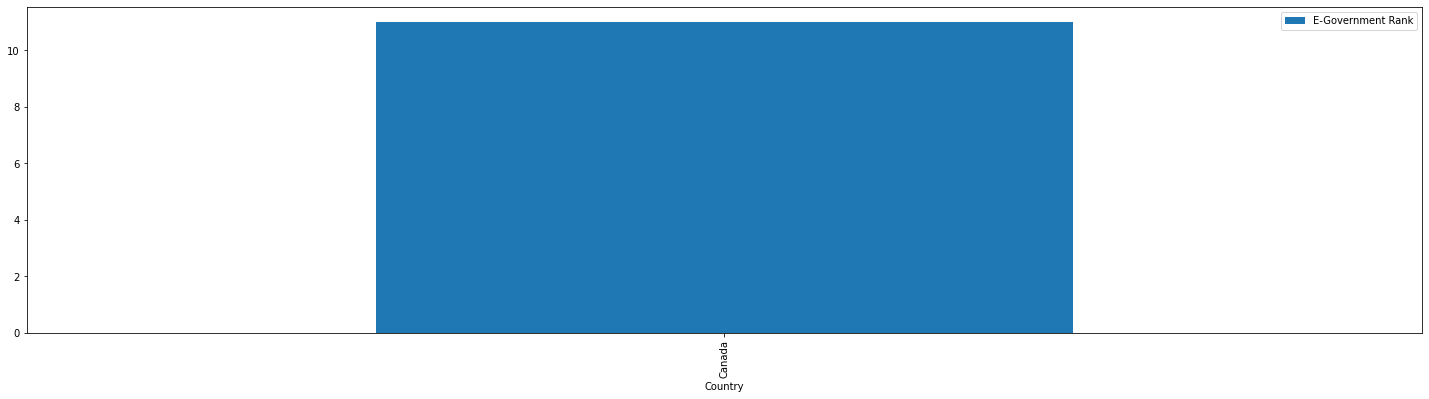

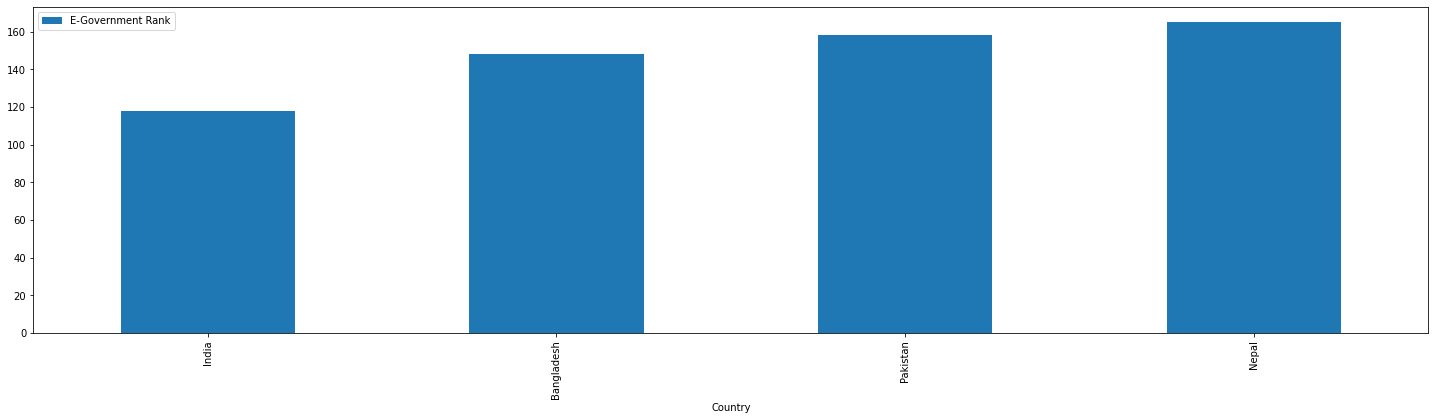

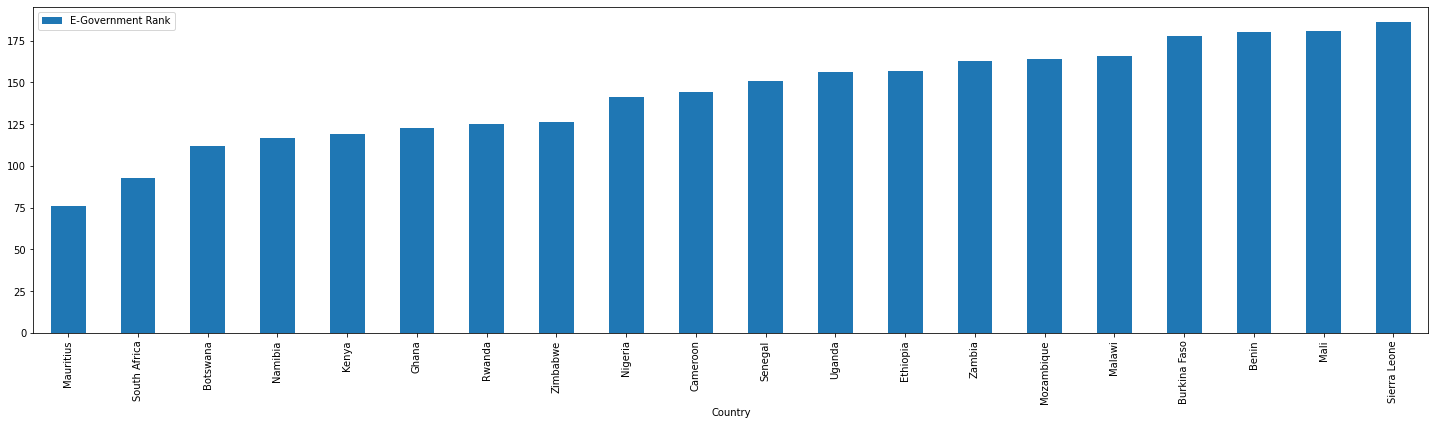

In [5]:
df_2014_sorted = df_2014.sort_values(by = "E-Government Rank")
df_2014_grouped = df_2014_sorted.groupby('Region')
df_2014_grouped.plot.bar(x='Country',y='E-Government Rank',rot=90, figsize=(25,6));

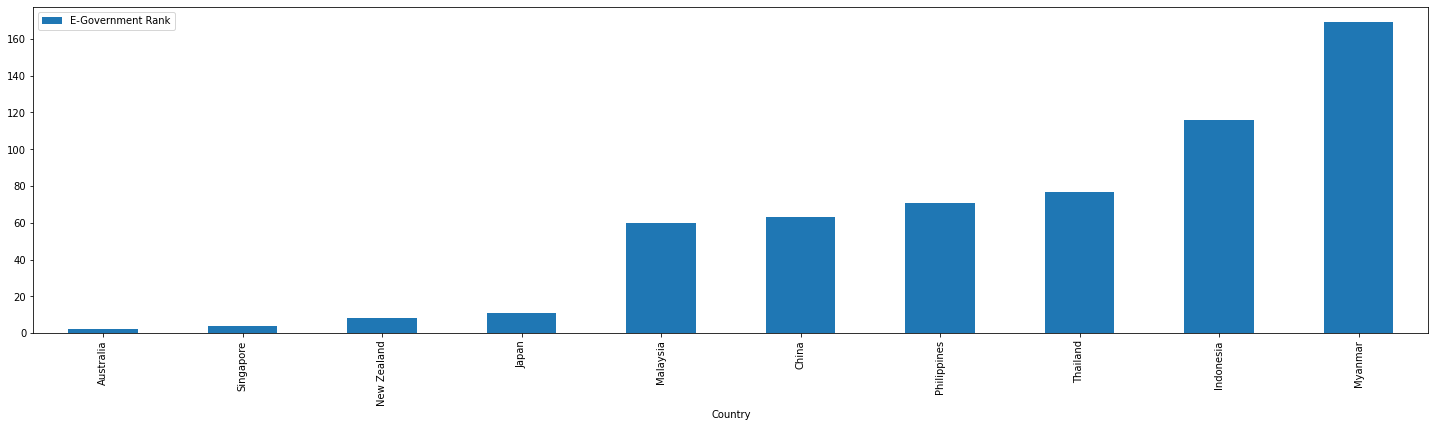

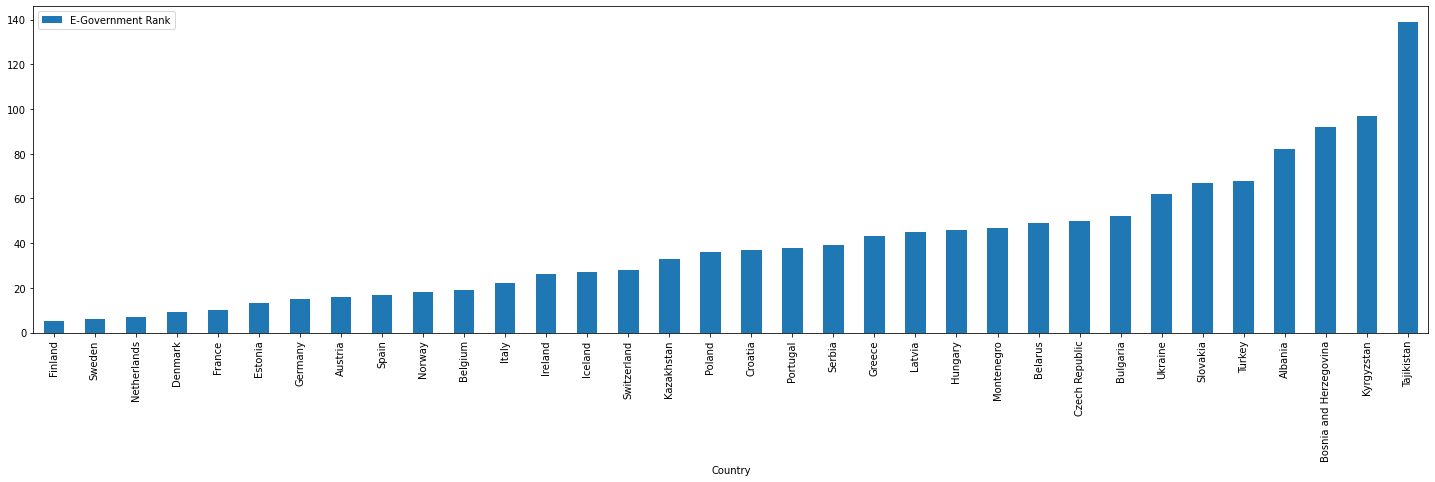

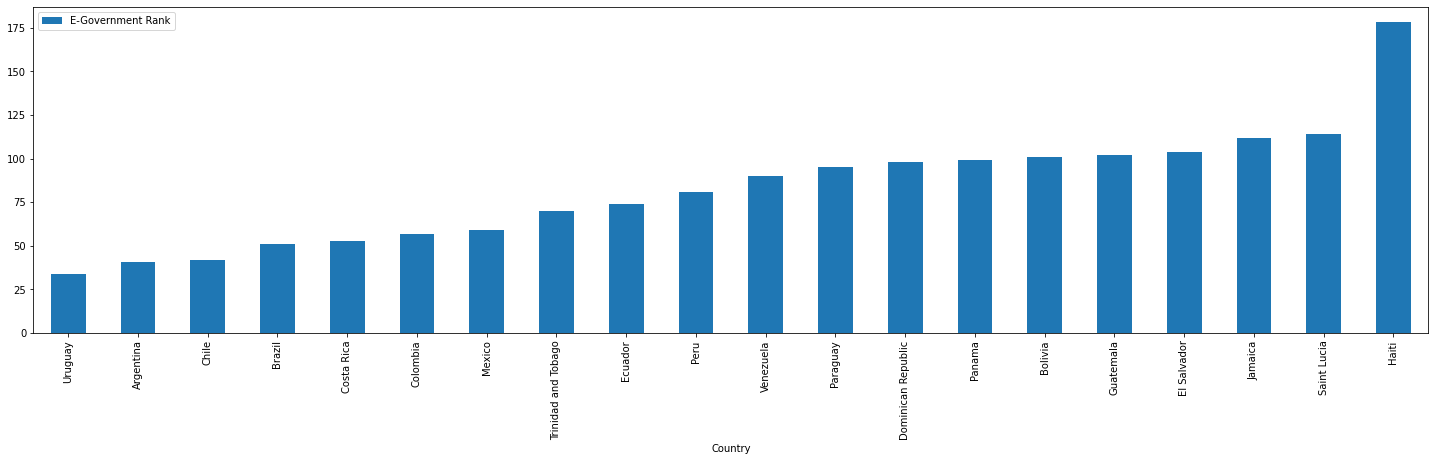

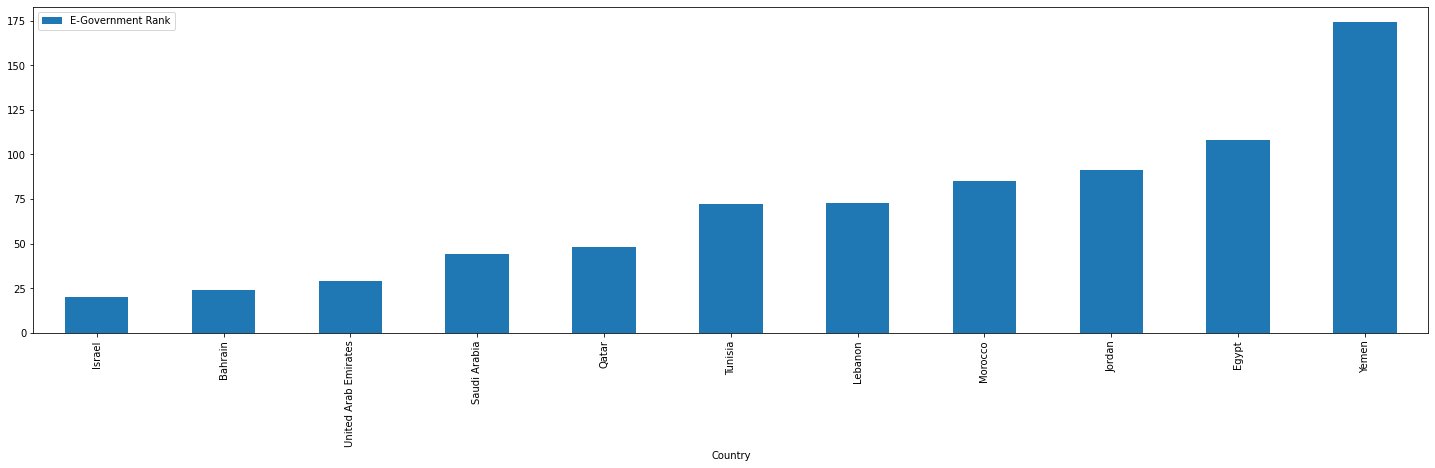

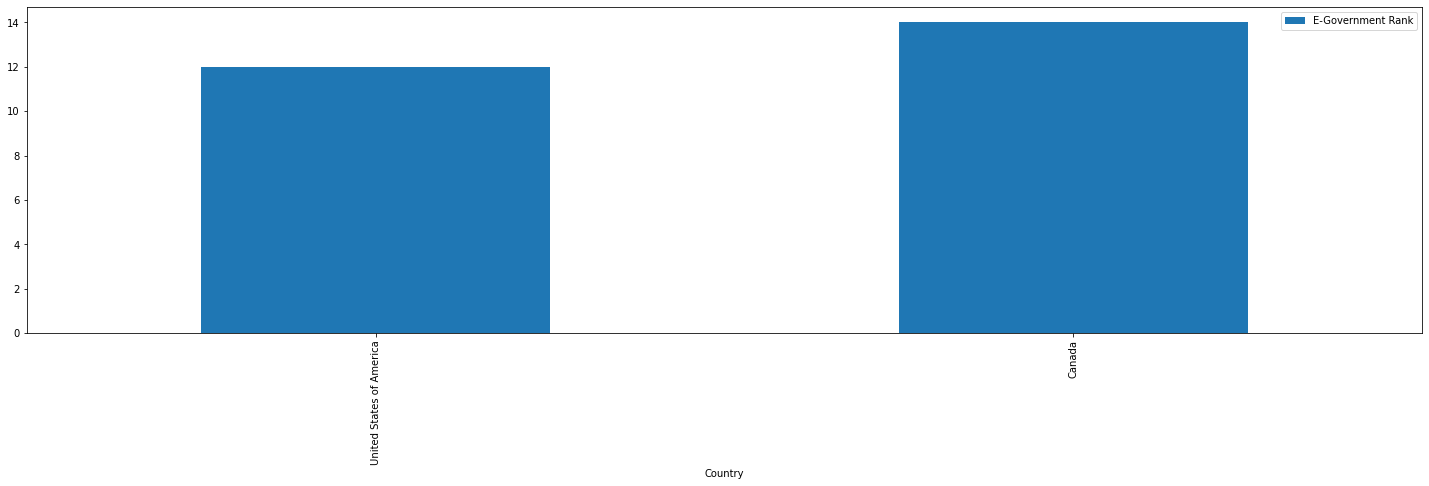

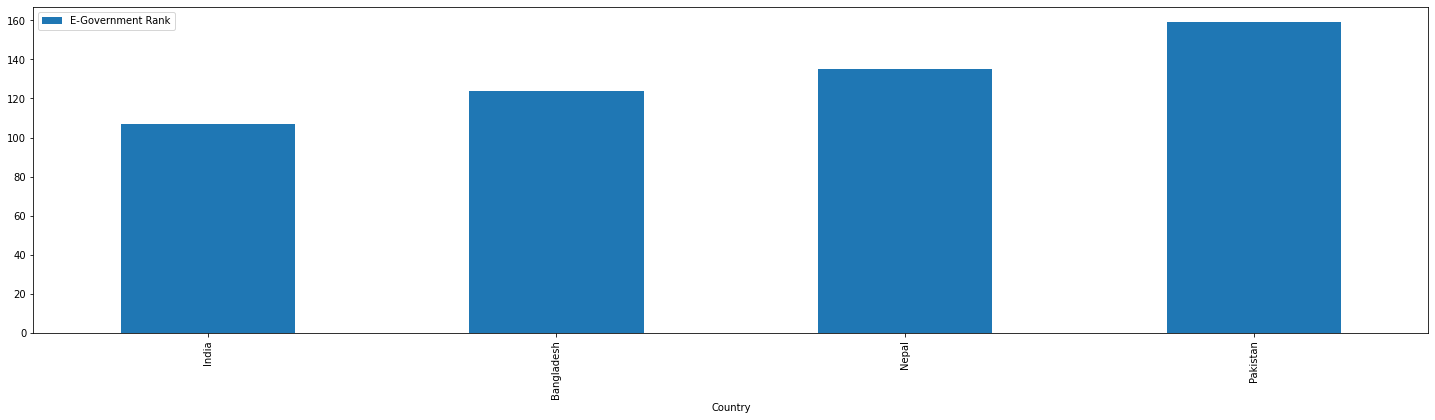

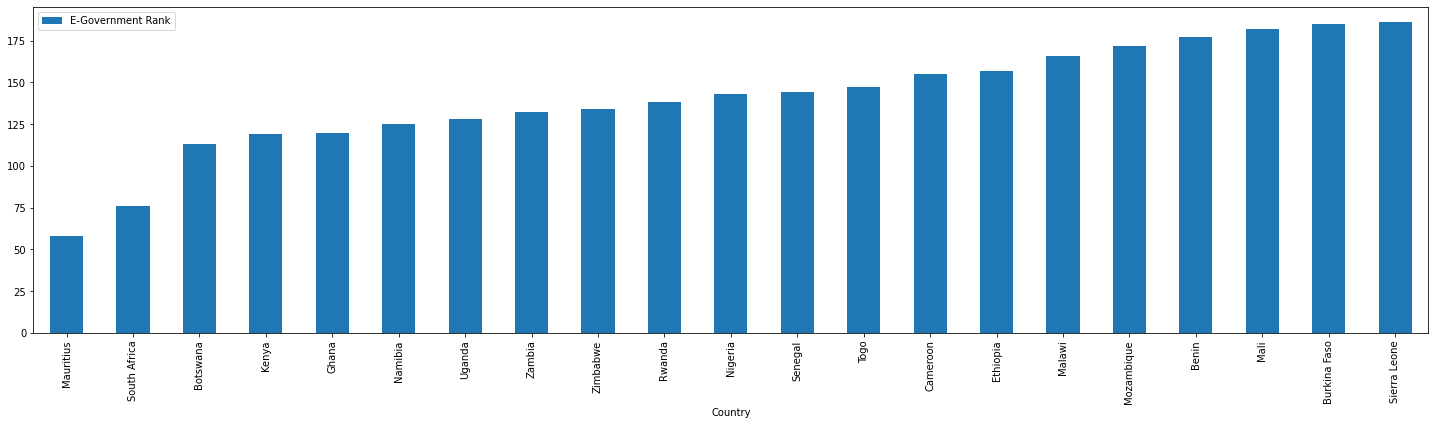

In [6]:
df_2016_sorted = df_2016.sort_values(by = "E-Government Rank")
df_2016_grouped = df_2016_sorted.groupby('Region')
df_2016_grouped.plot.bar(x='Country',y='E-Government Rank',rot=90, figsize=(25,6));

In [7]:
df_2016_sorted = df_2016.sort_values(by = "ODB-Rank")
df_2016_grouped = df_2016_sorted.groupby('Region')
#df_2016_grouped.plot.bar(x='Country',y='ODB-Rank',rot=90, figsize=(25,6));

In [8]:
df_2016_grouped.head()

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,...,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2016,North America,CA,CAN,2,Canada,89.54,96,87,66,...,63,90,43,8,14,0.82847,0.91525,0.95652,0.85717,0.67173
1,2016,Europe & Central Asia,FR,FRA,3,France,85.13,100,77,70,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,2016,North America,US,USA,4,United States of America,81.62,96,84,63,...,55,70,62,9,12,0.84201,0.89831,0.92754,0.88155,0.71696
3,2016,East Asia & Pacific,AU,AUS,5,Australia,81.15,85,79,76,...,45,75,61,11,2,0.91428,0.98305,0.97826,1.00000,0.76459
4,2016,East Asia & Pacific,NZ,NZL,7,New Zealand,79.38,92,53,63,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364
5,2016,East Asia & Pacific,JP,JPN,8,Japan,75.16,84,67,60,...,82,80,51,4,11,0.84397,0.98305,0.87681,0.82738,0.82771
6,2016,Europe & Central Asia,NL,NLD,8,Netherlands,74.95,94,59,63,...,63,50,47,16,7,0.86586,0.94915,0.92754,0.91830,0.75173
7,2016,Europe & Central Asia,NO,NOR,10,Norway,73.81,77,86,70,...,92,20,58,13,18,0.81168,0.76271,0.80435,0.90306,0.72764
8,2016,Europe & Central Asia,ES,ESP,11,Spain,73.36,81,60,61,...,56,40,100,7,17,0.81350,0.93220,0.91304,0.87821,0.64926
9,2016,Latin America & Caribbean,MX,MEX,11,Mexico,73.45,83,58,58,...,100,60,51,6,59,0.61953,0.88136,0.84783,0.69934,0.31143


In [65]:
csv_merge = "../Resources/Joined1416 copy.csv"
df_1416 = pd.read_csv(csv_merge)
df_1416

,Unnamed: 0,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,...,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,0,2014,Europe & Central Asia,SE,SWE,3,Sweden,83.70,100,67,...,85,91,53,4,14,0.82250,0.60784,0.70078,0.88020,0.88656
1,1,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,...,74,60,79,5,4,0.89384,0.96078,1.00000,0.88120,0.80029
2,2,2014,East Asia & Pacific,NZ,NZL,4,New Zealand,80.01,81,76,...,69,0,67,14,9,0.86436,0.78431,0.84251,1.00000,0.75057
3,3,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,...,76,26,46,13,5,0.88966,1.00000,0.92913,0.92240,0.81751
4,4,2014,Europe & Central Asia,NO,NOR,7,Norway,74.59,88,70,...,100,17,48,8,13,0.83572,0.68627,0.75590,0.93800,0.81328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,97,2016,Sub-Saharan Africa,MZ,MOZ,110,Mozambique,3.46,14,9,...,0,0,0,104,172,0.23050,0.20339,0.20290,0.38930,0.09929
177,98,2016,Sub-Saharan Africa,ML,MLI,111,Mali,2.46,12,8,...,0,0,0,103,182,0.18165,0.06780,0.09420,0.23583,0.21492
178,99,2016,Sub-Saharan Africa,ZW,ZWE,111,Zimbabwe,1.87,9,7,...,0,0,0,115,134,0.34722,0.28814,0.26087,0.56412,0.21666
179,100,2016,East Asia & Pacific,MM,MMR,113,Myanmar,1.33,2,8,...,10,0,0,85,169,0.23619,0.10169,0.15942,0.48365,0.06551


In [14]:
x_axis = df_1416['ODB-Rank']
y_axis = df_1416["E-Government Rank"]

In [15]:
def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    
    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #graphing
    plt.figure(figsize=(13,8))
    plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
    plt.plot(x_axis,regress_values,"r-")

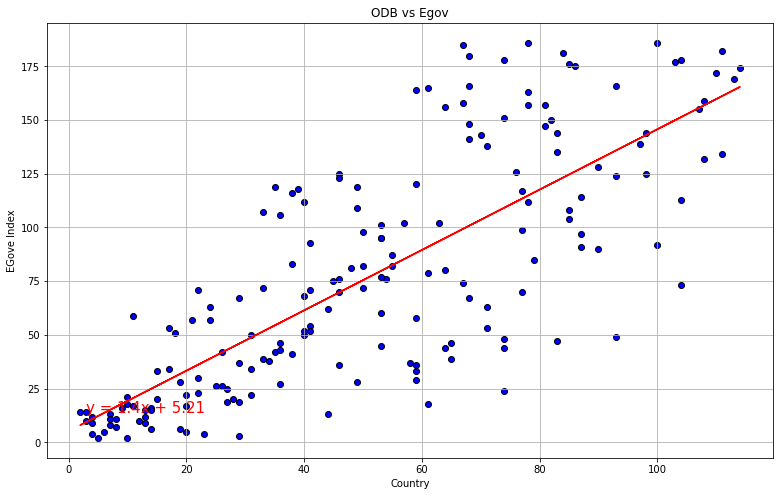

In [17]:

weather_graphing(x_axis, y_axis, "ODB vs Egov", "Country", "EGove Index", (3,14))

In [108]:
df_2014 = df_2014.sort_values(by=['E-Government Index'], ascending=False)
df_2014
#df_14_16.plot.bar(x='Region',y='E-Government Index',rot=90, figsize=(25,6));

,Unnamed: 0,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,...,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,Cluster-Group,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
7,9,2014,East Asia & Pacific,AU,AUS,10,Australia,68.33,92,86,...,46,40,20,High capacity,2,0.91034,0.94117,0.92913,0.9978,0.80405
25,29,2014,East Asia & Pacific,SG,SGP,29,Singapore,46.06,71,39,...,43,38,20,High capacity,3,0.90762,0.90196,0.99212,0.8515,0.87927
1,3,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,...,60,79,5,High capacity,4,0.89384,0.96078,1.00000,0.8812,0.80029
3,5,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,...,26,46,13,High capacity,5,0.88966,1.00000,0.92913,0.9224,0.81751
15,18,2014,East Asia & Pacific,JP,JPN,19,Japan,53.58,81,53,...,43,20,26,High capacity,6,0.88744,0.96078,0.94488,0.8621,0.85533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,84,2014,Latin America & Caribbean,HT,HTI,85,Haiti,1.19,5,4,...,0,0,65,Capacity constrained,176,0.18086,0.17647,0.11023,0.3372,0.09521
66,73,2014,Sub-Saharan Africa,BF,BFA,74,Burkina Faso,11.32,31,7,...,0,0,65,Capacity constrained,178,0.18043,0.13725,0.29921,0.1578,0.08423
63,69,2014,Sub-Saharan Africa,BJ,BEN,68,Benin,11.98,15,15,...,0,0,65,Capacity constrained,180,0.16850,0.17647,0.11023,0.2756,0.11964
76,83,2014,Sub-Saharan Africa,ML,MLI,84,Mali,3.30,19,2,...,0,6,51,Capacity constrained,181,0.16335,0.15686,0.13385,0.2212,0.13501


In [109]:
x_axis = df_2014['Country']
y_axis = df_2014["E-Government Index"]
xticks = df_2014['Country']

In [110]:
def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    
#     #linear regression
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#     regress_values = x_axis * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #graphing
    plt.figure(figsize=(20,8))
    plt.bar(x_axis, y_axis)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.grid()

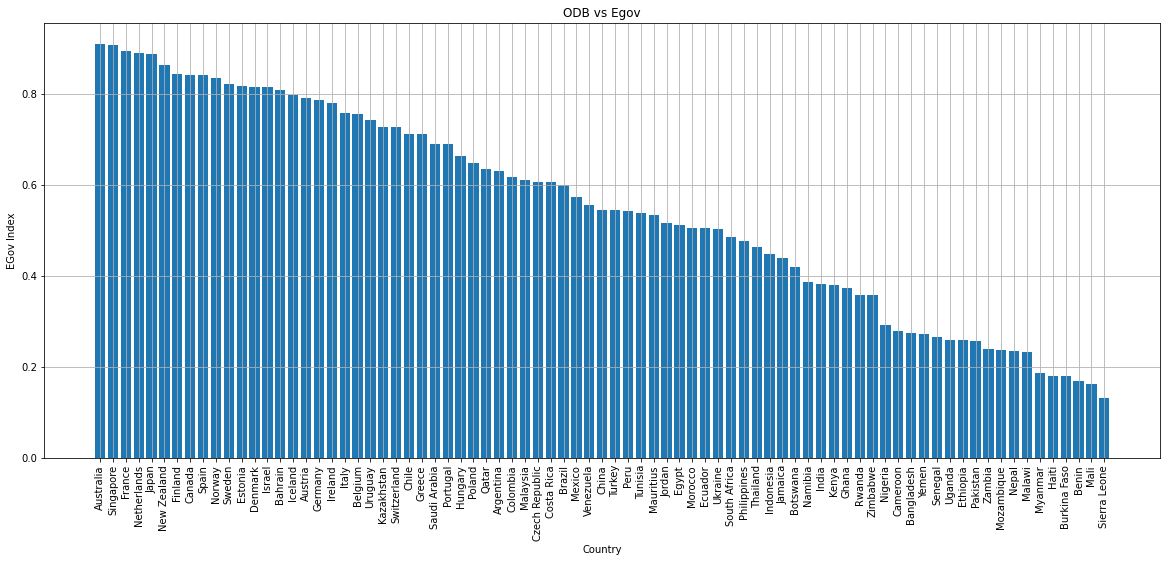

In [111]:
weather_graphing(x_axis, y_axis, "ODB vs Egov", "Country", "EGov Index", (3,14))

In [113]:
df_2016 = df_2016.sort_values(by=['E-Government Index'], ascending=False)
x_axis = df_2016['Country']
y_axis = df_2016["E-Government Index"]

In [114]:
def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    
#     #linear regression
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#     regress_values = x_axis * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #graphing
    plt.figure(figsize=(20,8))
    plt.bar(x_axis, y_axis)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.grid()

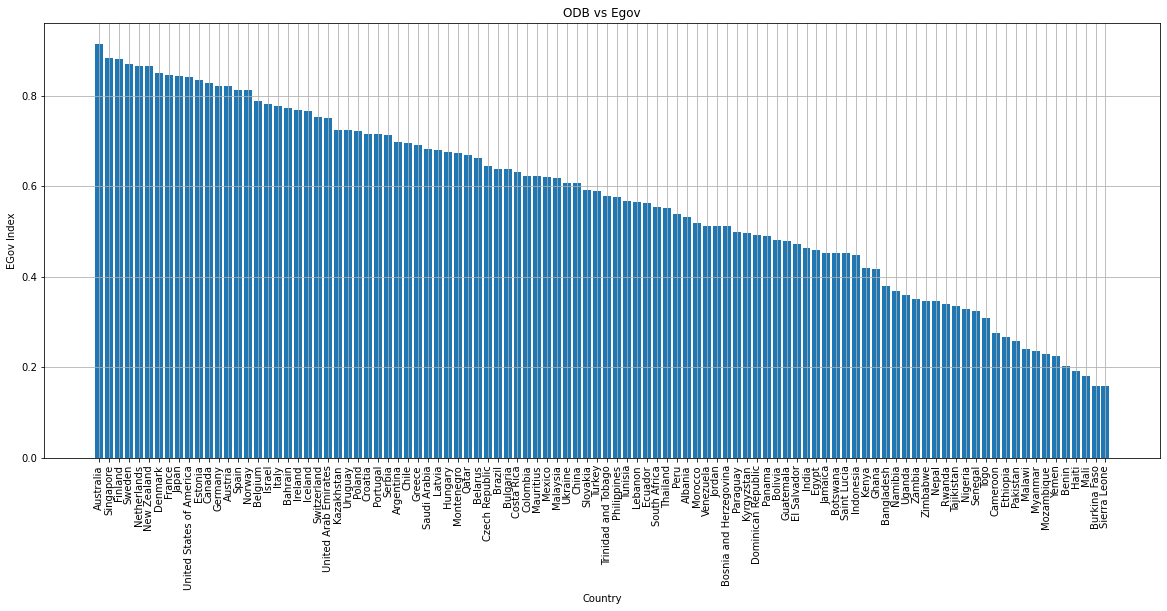

In [115]:
weather_graphing(x_axis, y_axis, "ODB vs Egov", "Country", "EGov Index", (3,14))

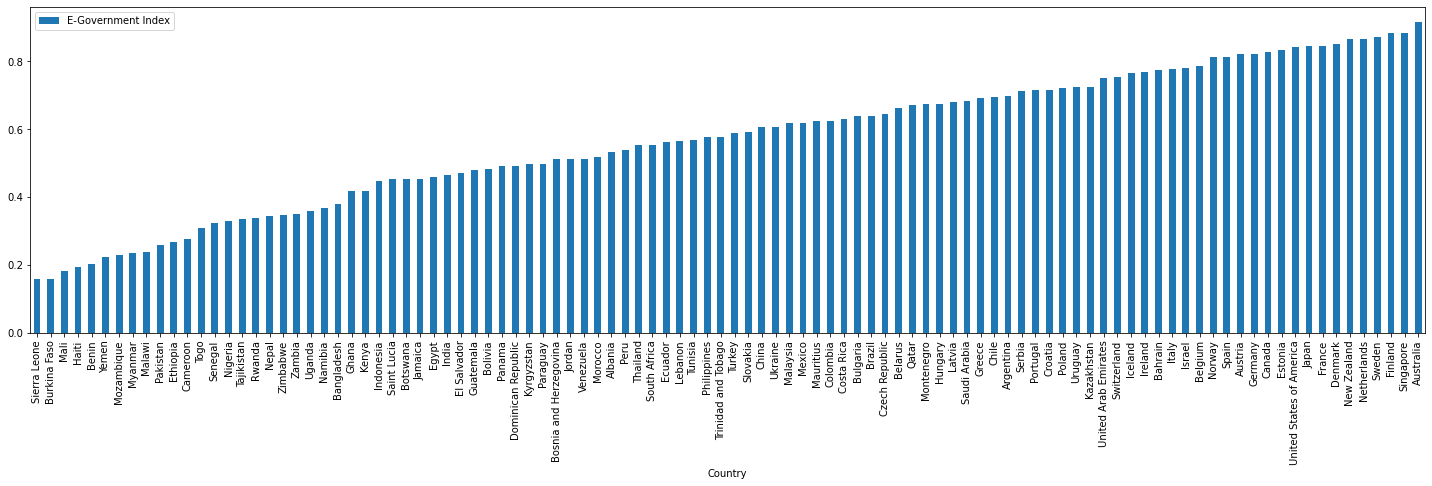

In [100]:
df_ = df_2016.sort_values(by=['E-Government Index'])
df_2016.plot.bar(x='Country',y='E-Government Index',rot=90, figsize=(25,6));

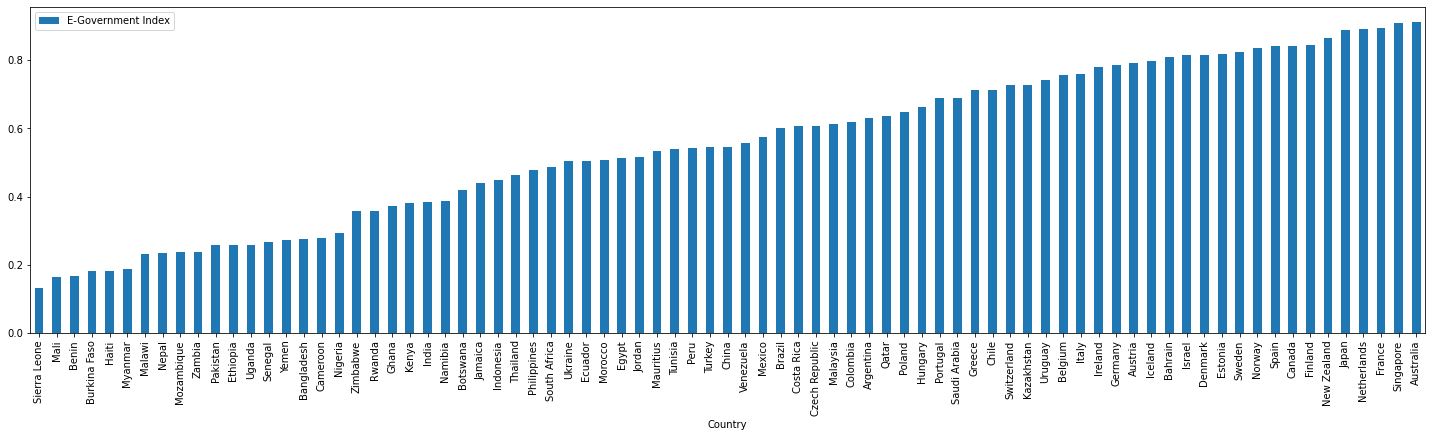

In [66]:
df_2014 = df_2014.sort_values(by=['E-Government Index'])
df_2014.plot.bar(x='Country',y='E-Government Index',rot=90, figsize=(25,6));

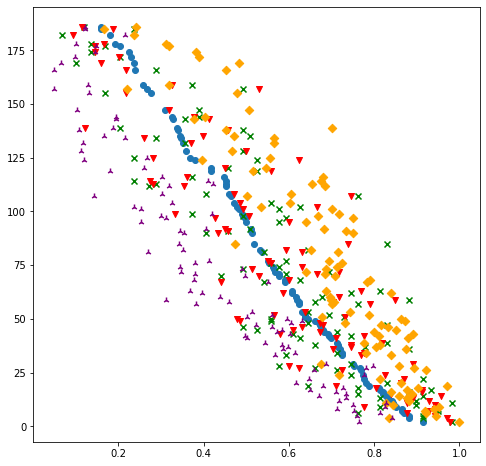

In [68]:
fig, ax = plt.subplots(figsize=(8,8));
y_axis = df_2016['E-Government Rank']
x_axis1 = df_2016['E-Government Index']
x_axis2 = df_2016['E-Participation Index']
x_axis3 = df_2016['Online Service Index']
x_axis4 = df_2016['Human Capital Index']
x_axis5 = df_2016['Telecommunication Infrastructure Index']
ax.scatter(x_axis1, y_axis, marker = 'o')
ax.scatter(x_axis2, y_axis, marker = 'x', color='green')
ax.scatter(x_axis3, y_axis, marker = 'v', color='red')
ax.scatter(x_axis4, y_axis, marker = 'D', color='orange')
ax.scatter(x_axis5, y_axis, marker = '2', color='purple')